# install necessary lib

In [172]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/jirayuwat/Desktop/GAN-indiv-study/env/bin/python3 -m pip install --upgrade pip' command.


# import lib

In [173]:
import torch
from torch import nn

from torchsummary import summary
from torchvision import transforms, datasets

from tqdm import tqdm

import matplotlib.pyplot as plt

import random

# load data

- load as data loader 
- batch size = 128
- image pixel value [0,1]
- only 1 channel

In [174]:
SEED = 1
BATCH_SIZE = 128
TEST_BATCH_SIZE = 128
torch.manual_seed(SEED)
train_loader = torch.utils.data.DataLoader (datasets.MNIST('dataset/', 
                                                           train=True, 
                                                           download=True,
                                                           transform= transforms.Compose([transforms.ToTensor()])
                                                           ),
                                            batch_size = BATCH_SIZE, 
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('dataset/', 
                                                         train=False, 
                                                         transform=transforms.Compose([transforms.ToTensor()])
                                                        ), 
                                          batch_size = TEST_BATCH_SIZE, 
                                          shuffle=True)

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(0.9961)
tensor(0.) tensor(1.)


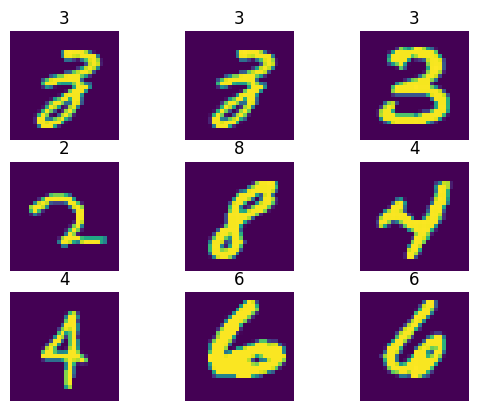

In [175]:
img, label = next(iter(train_loader))
import random
for i in range(9):
    idx = random.randint(0,63)
    plt.subplot(3, 3, i+1)
    plt.imshow(img[idx].reshape(28,28,1))
    plt.axis('off')
    plt.title(label[idx].item())
    print(torch.min(img[idx]), torch.max(img[idx]))


# create model

In [176]:
LATENT_SIZE = 2
IMAGE_SIZE = (1, 28, 28)

In [196]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

class VAE_model(nn.Module):
    
    def __init__(self, latent_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(IMAGE_SIZE[0] * IMAGE_SIZE[1] * IMAGE_SIZE[2], 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, latent_size)
        )
        self.encoder.apply(init_weights)

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, IMAGE_SIZE[0] * IMAGE_SIZE[1] * IMAGE_SIZE[2]),
            nn.ReLU(),
            nn.Unflatten(1, IMAGE_SIZE),
            nn.Sigmoid(),
        )
        self.decoder.apply(init_weights)
    
    def forward(self, x_in):
        
        x_in = self.encoder(x_in)
        x_in = self.decoder(x_in)

        return x_in
    
summary(VAE_model(LATENT_SIZE), IMAGE_SIZE)

vae_model = VAE_model(LATENT_SIZE)
vae_loss_fn = nn.MSELoss()

vae_optimizer = torch.optim.Adam(params=vae_model.parameters(), lr = 5e-5)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
              ReLU-2                  [-1, 784]               0
            Linear-3                 [-1, 1000]         785,000
              ReLU-4                 [-1, 1000]               0
            Linear-5                 [-1, 1000]       1,001,000
              ReLU-6                 [-1, 1000]               0
            Linear-7                 [-1, 1000]       1,001,000
              ReLU-8                 [-1, 1000]               0
            Linear-9                    [-1, 2]           2,002
           Linear-10                 [-1, 1000]           3,000
             ReLU-11                 [-1, 1000]               0
           Linear-12                 [-1, 1000]       1,001,000
             ReLU-13                 [-1, 1000]               0
           Linear-14                 [-

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_27043/1633932587.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


# train model

## Train controller

In [178]:
TRAIN_VAE = True

In [179]:
EPOCHS = 20 if TRAIN_VAE else 0

for epoch in range(EPOCHS):
    epoch += 1
    for batch_idx, (x_train, y_train) in enumerate(train_loader):
        vae_model.train()
        x_pred = vae_model(x_train)
        loss = vae_loss_fn(x_pred, x_train)
        vae_optimizer.zero_grad()
        loss.backward()
        vae_optimizer.step()

        vae_model.eval()
        with torch.inference_mode():
            if batch_idx % 10 == 0:
                print(f'Epoch: {epoch}/{EPOCHS}({batch_idx})\t: Loss = {loss.item()}')
                


Epoch: 1/20(0)	: Loss = 0.2331504076719284
Epoch: 1/20(10)	: Loss = 0.23227016627788544
Epoch: 1/20(20)	: Loss = 0.23212940990924835
Epoch: 1/20(30)	: Loss = 0.2314738780260086
Epoch: 1/20(40)	: Loss = 0.23087178170681
Epoch: 1/20(50)	: Loss = 0.23128566145896912
Epoch: 1/20(60)	: Loss = 0.2311369627714157
Epoch: 1/20(70)	: Loss = 0.23181189596652985
Epoch: 1/20(80)	: Loss = 0.23120681941509247
Epoch: 1/20(90)	: Loss = 0.23086383938789368
Epoch: 1/20(100)	: Loss = 0.23097318410873413
Epoch: 1/20(110)	: Loss = 0.2313603311777115
Epoch: 1/20(120)	: Loss = 0.2308373600244522
Epoch: 1/20(130)	: Loss = 0.23033550381660461
Epoch: 1/20(140)	: Loss = 0.23036088049411774
Epoch: 1/20(150)	: Loss = 0.23053772747516632
Epoch: 1/20(160)	: Loss = 0.23067085444927216
Epoch: 1/20(170)	: Loss = 0.22979174554347992
Epoch: 1/20(180)	: Loss = 0.23027309775352478
Epoch: 1/20(190)	: Loss = 0.22980329394340515
Epoch: 1/20(200)	: Loss = 0.2295912653207779
Epoch: 1/20(210)	: Loss = 0.2301485538482666
Epoch: 1/

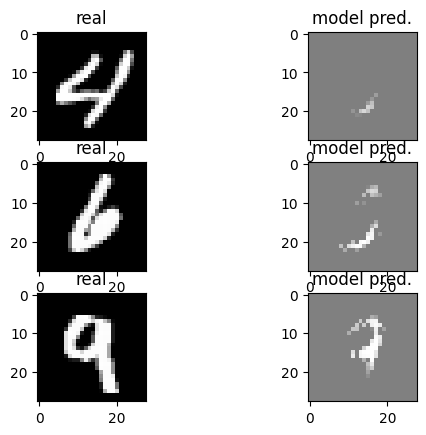

In [195]:
img, _ = next(iter(train_loader))


for i in range(3):
    idx = random.randint(0, BATCH_SIZE - 1)
    x_pred = vae_model(img[idx]).detach().numpy().reshape((28, 28, 1))
    plt.subplot(3, 2, i*2 + 1)
    plt.title('real')
    plt.imshow(img[idx].reshape(28, 28, 1), vmin=0, vmax=1, cmap='gray')
    plt.subplot(3, 2, i*2 + 2)
    plt.title('model pred.')
    plt.imshow(x_pred, vmin=0, vmax=1, cmap='gray')
